In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#dataset_clustering = pd.read_csv('drive/MyDrive/dataset_clustering.csv')
dataset_clustering = pd.read_csv('dataset_clustering.csv')
dataset_clustering.drop("TransactionID", axis=1, inplace=True)
dataset_clustering.head(n = 5)

,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAGE
0,1,59950.44,50.0,23
1,0,10100.84,338.0,37
2,1,1283.12,250.0,47
3,0,2177.85,54.0,26
4,0,32816.17,315.0,24


Standardizzazione

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_standard = pd.DataFrame(sc.fit_transform(dataset_clustering))

In [5]:
df_standard.head()

,0,1,2,3
0,1.621242,-0.045171,-0.259427,-0.798168
1,-0.616811,-0.102238,-0.201365,0.837012
2,1.621242,-0.112332,-0.219106,2.004997
3,-0.616811,-0.111308,-0.258621,-0.447772
4,-0.616811,-0.076234,-0.206002,-0.681369


In [10]:
x = df_standard.iloc[:, [3,2]].values #CustomerAGE-TransactionAmount (INR) 
print(x.shape)

(40232, 2)


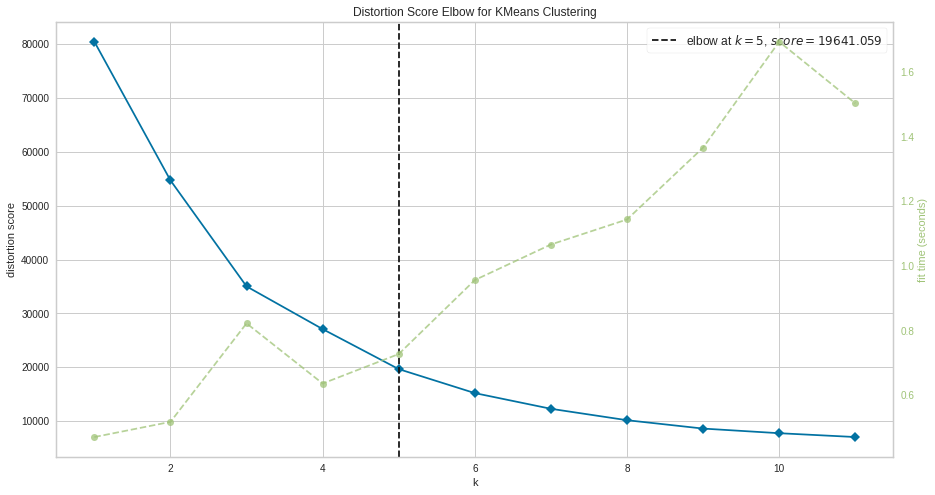

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        

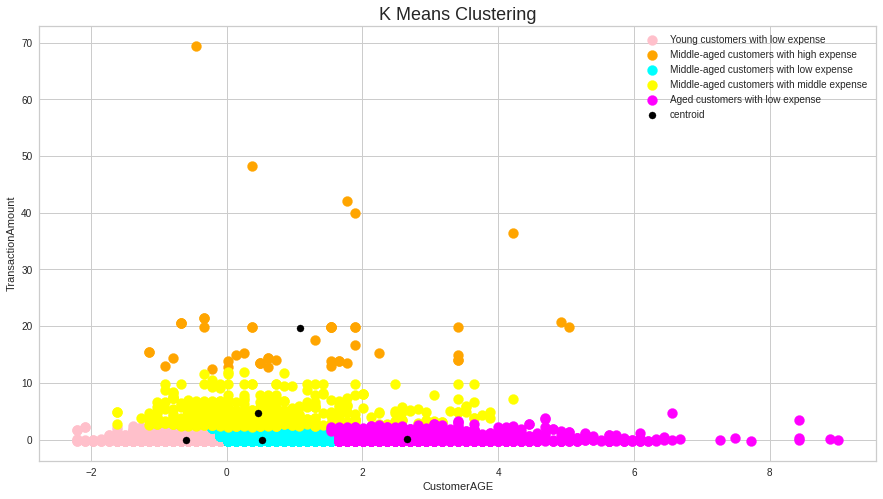

In [12]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Young customers with low expense')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'orange', label = 'Middle-aged customers with high expense')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Middle-aged customers with low expense')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'yellow', label = 'Middle-aged customers with middle expense')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'magenta', label = 'Aged customers with low expense')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 18)
plt.xlabel('CustomerAGE')
plt.ylabel('TransactionAmount')
plt.legend()
plt.show()

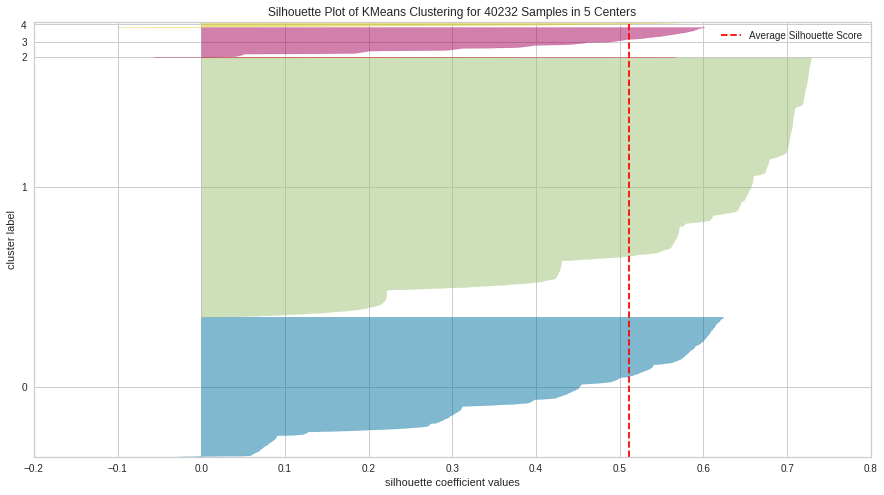

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()

In [35]:
b = df_standard.iloc[:, [3,1]].values #CustomerAGE-CustAccountBalance 
print(b.shape)

(40232, 2)


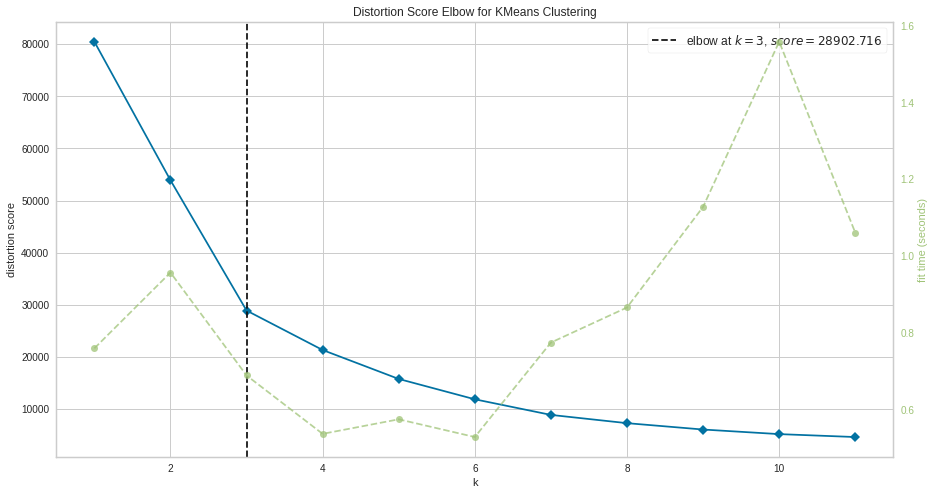

In [36]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(b)        # Fit the data to the visualizer
visualizer.show() 

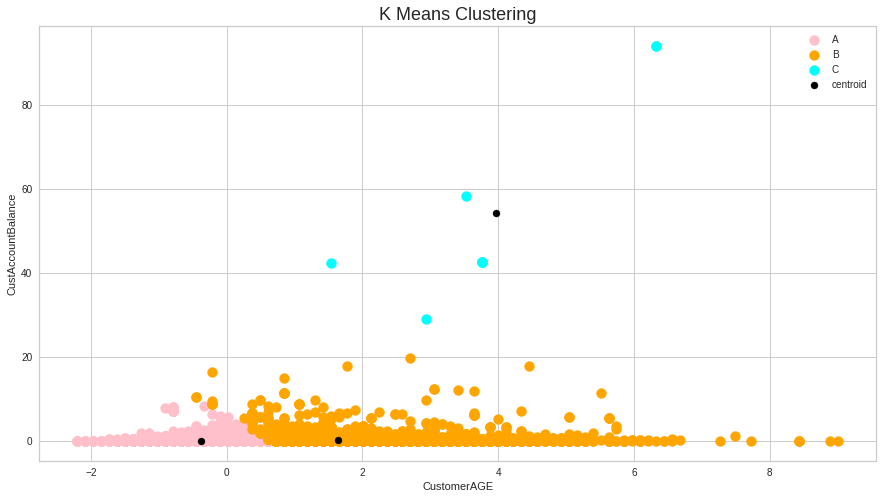

In [41]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(b)

plt.figure(figsize=(15,8))
plt.scatter(b[y_means == 0, 0], b[y_means == 0, 1], s = 100, c = 'pink', label = 'A')
plt.scatter(b[y_means == 1, 0], b[y_means == 1, 1], s = 100, c = 'orange', label = 'B')
plt.scatter(b[y_means == 2, 0], b[y_means == 2, 1], s = 100, c = 'cyan', label = 'C')
#plt.scatter(b[y_means == 3, 0], b[y_means == 3, 1], s = 100, c = 'yellow', label = '')
#plt.scatter(b[y_means == 4, 0], b[y_means == 4, 1], s = 100, c = 'magenta', label = '')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 18)
plt.xlabel('CustomerAGE')
plt.ylabel('CustAccountBalance')
plt.legend()
plt.show()

Campionamento random di 30000 righe

In [14]:
df_standard_reduced = df_standard.sample(n = 30000)

Prendo due features

In [15]:
y = df_standard_reduced.iloc[:, [3,2]].values #CustomerAGE-TransactionAmount (INR) 
print(y.shape)

(30000, 2)


Cluster Gerarchico

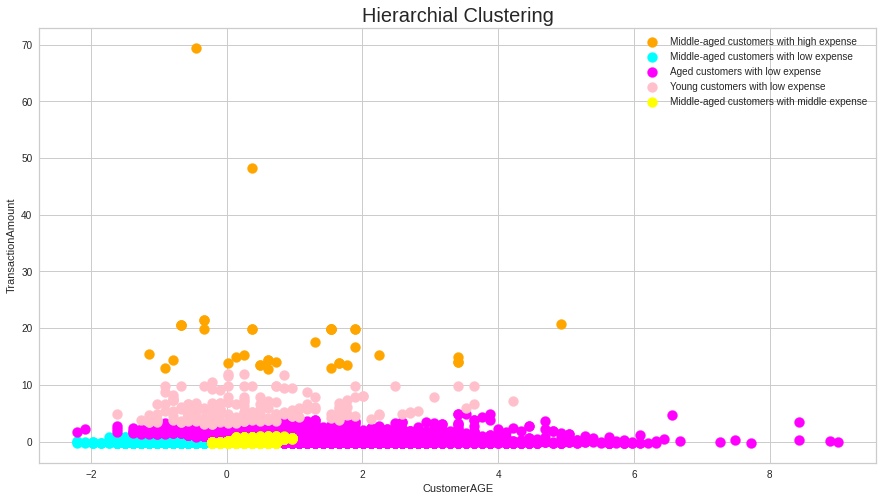

In [38]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(y)

plt.figure(figsize=(15,8))
plt.scatter(y[y_hc == 0, 0], y[y_hc == 0, 1], s = 100,  c = 'orange', label = 'Middle-aged customers with high expense' )
plt.scatter(y[y_hc == 1, 0], y[y_hc == 1, 1], s = 100, c = 'cyan', label = 'Middle-aged customers with low expense')
plt.scatter(y[y_hc == 2, 0], y[y_hc == 2, 1], s = 100, c = 'magenta', label = 'Aged customers with low expense')
plt.scatter(y[y_hc == 3, 0], y[y_hc == 3, 1], s = 100, c = 'pink', label = 'Young customers with low expense')
plt.scatter(y[y_hc == 4, 0], y[y_hc == 4, 1], s = 100, c = 'yellow', label = 'Middle-aged customers with middle expense')

plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('CustomerAGE')
plt.ylabel('TransactionAmount')
plt.legend()
plt.show()

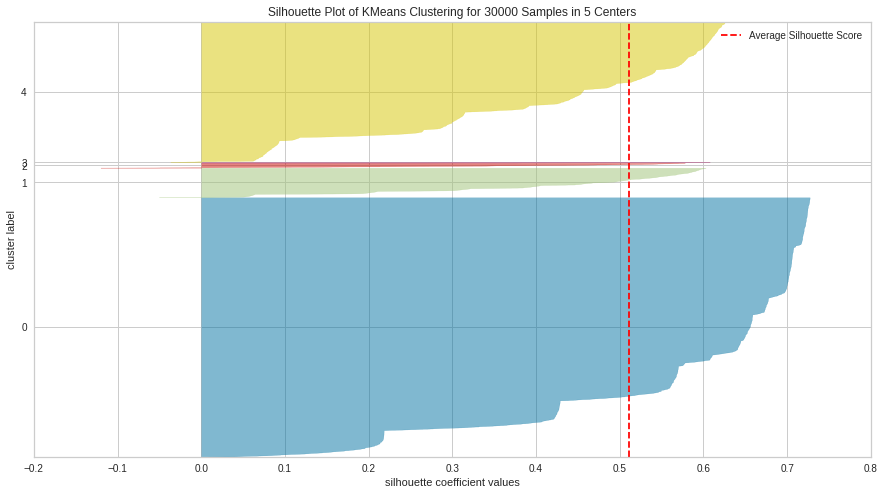

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()

Clustering multidimensionale

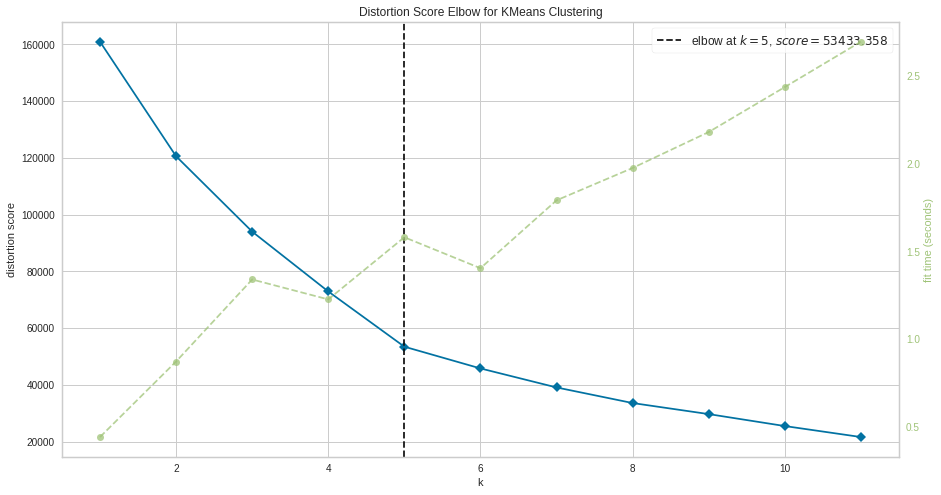

In [21]:
from yellowbrick.cluster import KElbowVisualizer

w = df_standard.values
#print(w)
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(w)        # Fit the data to the visualizer
visualizer.show()  

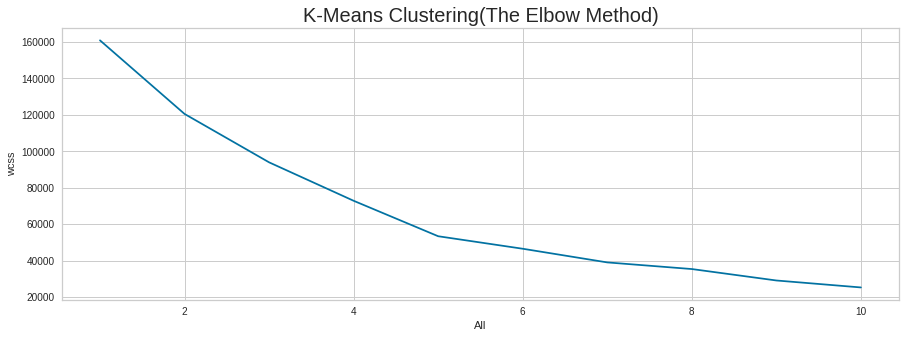

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(w)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('All')
plt.ylabel('wcss')
plt.show()

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver="auto").fit(w)
pca_w = pca.transform(w)

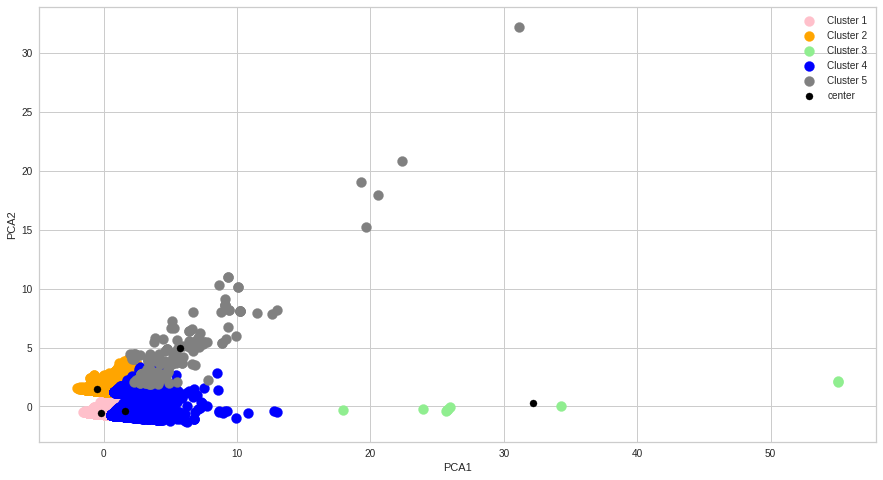

In [46]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(w)

plt.figure(figsize=(15,8))
#plt.title('Cluster of PCAs', fontsize = 18)

plt.scatter(pca_w[ymeans == 0, 0], pca_w[ymeans == 0, 1], s = 100, c = 'pink', label = "Cluster 1")
plt.scatter(pca_w[ymeans == 1, 0], pca_w[ymeans == 1, 1], s = 100, c = 'orange', label = "Cluster 2")
plt.scatter(pca_w[ymeans == 2, 0], pca_w[ymeans == 2, 1], s = 100, c = 'lightgreen', label = "Cluster 3")
plt.scatter(pca_w[ymeans == 3, 0], pca_w[ymeans == 3, 1], s = 100, c = 'blue', label = "Cluster 4")
plt.scatter(pca_w[ymeans == 4, 0], pca_w[ymeans == 4, 1], s = 100, c = 'gray', label = "Cluster 5")
#plt.scatter(pca_w[ymeans == 5, 0], pca_w[ymeans == 5, 1], s = 100, c = 'red')

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

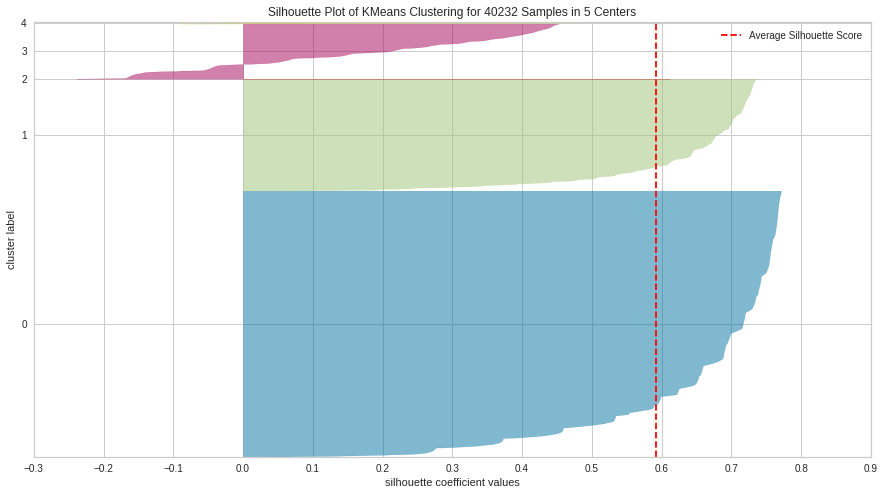

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer
# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(w)        # Fit the data to the visualizer
visualizer.show()

SOM 

In [49]:
#pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=1b0bc5ea6a8762dddc7aebb30a505e7f4e3bb965307b24b86564a275b15bb844
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built MiniSom


In [51]:
from minisom import MiniSom    

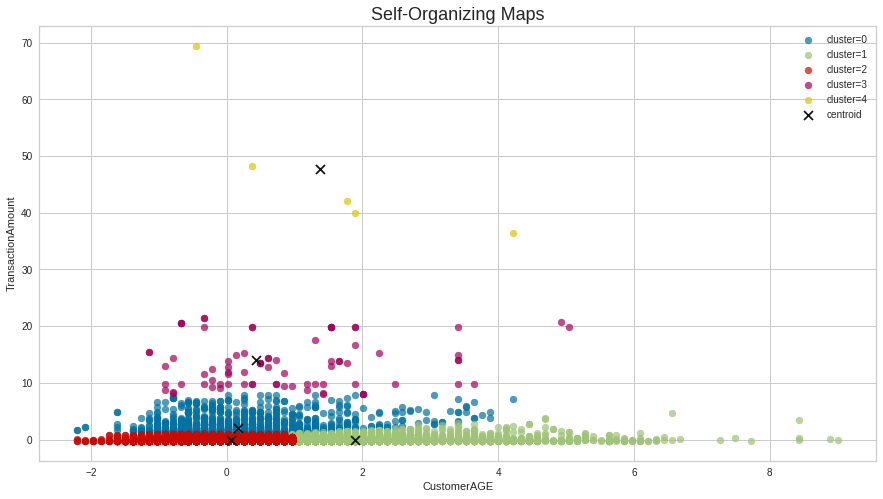

In [67]:
som = MiniSom(1, 5, 2, sigma=0.3, learning_rate=0.5) # initialization of 5x5 SOM
som.train(x, 1000000) # trains the SOM with 1000000 iterations


plt.figure(figsize=(15,8))
som_shape = (1, 5)
winner_coordinates = np.array([som.winner(i) for i in x]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)


# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(x[cluster_index == c, 0],
                x[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)


# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')

plt.title('Self-Organizing Maps', fontsize = 18)
plt.xlabel('CustomerAGE')
plt.ylabel('TransactionAmount')
plt.legend()
plt.show()